In [21]:
# Prelude
library(tidyverse)
library(tidytext)
library(glue)
library(stringr)

# Sentiment Analysis, Twitter, and Donald Trump
Kenia Pina Sanchez and Victoria Lam  
COMP 578 Data Mining

## Table of Contents

* Project proposal
* Dataset
* Analysis tools
* Analysis
* Future Work

## Project Proposal

<!--- Insert a COVID-19 image here --->
![Johns Hopkins University map of confirmed COVID-19 cases in the US](JHUcovidmap.png)
Image accessed 05 May 2020

In just a few months, COVID-19 became a pandemic that set the world on its heels. Nations scrambled to coordinate an effective response as COVID-19 spread indiscriminately. Donald Trump, whose presidency of the United States has been characterized with inaccurate statements and incohesive positions on a variety of pertinent issues such as healthcare, worker protections, and social safety nets, has tweeted extensively about the progression of theCOVID-19 pandemic, sometimes contradicting his own tweets later in the day.

We examine how his growing concern for COVID-19 affects his position on key issues pertaining to the coming election, such as the health of theeconomy, public perception of himself, and the medical response of key voter states.

This project is therefore a classification problem which gives insight intothe confidences and concerns, and thus the motivations for his actions, of the president as he prepares for the upcoming election.

## Dataset

![Twitter header for @realdonaldtrump](trumpTwitter.png)

We scraped twitter for tweets from Donald Trump over a period of January 01, 2020 to April 12, 2020. These tweets and the associated UTC datetime are stored as a .csv file called `trumpTweets.csv`.

In [22]:
trumpTweets <- read.csv("trumpTweets.csv")

head(trumpTweets)

,X,DateTime,Text
,<int>,<fct>,<fct>
1,0,2020-04-11 23:51:58+00:00,Will be interviewed by @JudgeJeanine tonight at 9:00 P.M. Eastern on @FoxNews!
2,1,2020-04-11 23:34:58+00:00,"So now the Fake News @nytimes is tracing the CoronaVirus origins back to Europe, NOT China. This is a first! I wonder what the Failing New York Times got for this one? Are there any NAMED sources? They were recently thrown out of China like dogs, and obviously want back in. Sad!"
3,2,2020-04-11 23:28:18+00:00,"Governor @GavinNewsom of California has been very nice &amp; highly supportive about the great job we have done, working together, for California. That is the good news, but this is the bad. He is unfairly under attack by the Radical Left Dems, MSDNC etc. He is strong! Will he fold?"
4,3,2020-04-11 22:38:29+00:00,I will be watching. HAVE A GREAT EASTER!
5,4,2020-04-11 22:35:35+00:00,"The Wall Street Journal Editorial Board doesn’t have a clue on how to fight and win. Their views on Tariffs & Trade are losers for the U.S., but winners for other countries, including China. If we followed their standards, we’d have no Country left. They should love Sleepy Joe!"
6,5,2020-04-11 21:53:36+00:00,"Watching @FoxNews on weekend afternoons is a total waste of time. We now have some great alternatives, like @OANN."


## Analysis Tools

* GetOldTweets3 (Python)
* R packages
  * tidyverse
  * tidytext
  * glue
  * stringr
  
The library `tidyverse` includes a number of dependencies:
* ggplot2
* tibble
* tidyr
* readr
* purrr
* dplyr
* stringr
* forcats

In [23]:
# Replace '$' with '' wherever it occurs
trumpTweets$Text <- gsub('\\$','',trumpTweets$Text)

# Address encoding issues

# Replace '&amp;' with '&'
trumpTweets$Text <- gsub('&amp;','&',trumpTweets$Text)

# Replace '‚Äú' with '"'
trumpTweets$Text <- gsub('‚Äú','"',trumpTweets$Text)

# Replace '‚Äô' with '''
trumpTweets$Text <- gsub('‚Äô',"'",trumpTweets$Text)

# Replace '‚Äì' with ''
trumpTweets$Text <- gsub('‚Äì','',trumpTweets$Text)


trumpTweets

X,DateTime,Text
<int>,<fct>,<chr>
0,2020-04-11 23:51:58+00:00,Will be interviewed by @JudgeJeanine tonight at 9:00 P.M. Eastern on @FoxNews!
1,2020-04-11 23:34:58+00:00,"So now the Fake News @nytimes is tracing the CoronaVirus origins back to Europe, NOT China. This is a first! I wonder what the Failing New York Times got for this one? Are there any NAMED sources? They were recently thrown out of China like dogs, and obviously want back in. Sad!"
2,2020-04-11 23:28:18+00:00,"Governor @GavinNewsom of California has been very nice & highly supportive about the great job we have done, working together, for California. That is the good news, but this is the bad. He is unfairly under attack by the Radical Left Dems, MSDNC etc. He is strong! Will he fold?"
3,2020-04-11 22:38:29+00:00,I will be watching. HAVE A GREAT EASTER!
4,2020-04-11 22:35:35+00:00,"The Wall Street Journal Editorial Board doesn’t have a clue on how to fight and win. Their views on Tariffs & Trade are losers for the U.S., but winners for other countries, including China. If we followed their standards, we’d have no Country left. They should love Sleepy Joe!"
5,2020-04-11 21:53:36+00:00,"Watching @FoxNews on weekend afternoons is a total waste of time. We now have some great alternatives, like @OANN."
6,2020-04-11 21:48:58+00:00,"“The President and the Federal Government are doing an excellent job. When they say the death toll isn’t going to be as high as reported, they (the opposition) act like they’re sad because it’s lower. I think they are (Press Conferences) wonderful.” West Virginia Resident, C Span"
7,2020-04-11 21:36:48+00:00,Great editorial by @SenRonJohnson!
8,2020-04-11 21:08:43+00:00,"Wishing all a safe and blessed Easter Sunday. I will be tuning into Pastor @robertjeffress at http://firstdallas.org/liveworship Church in Dallas, Texas tomorrow morning at 10:20 AM Eastern."


### Augmenting `bing`

In [24]:
# Tokenize
tokens <- tibble(text=trumpTweets$Text) %>% unnest_tokens(word,text)
head(tokens)

word
<chr>
will
be
interviewed
by
judgejeanine
tonight


In [25]:
# Create a database containing all words in the sentiment lexicon
# We are using bing.
bingWords <- get_sentiments('bing')[,1]

In [26]:
# Identify non-stop words that do not occur in bing
wordsByFreq <- tokens %>%
  anti_join(stop_words) %>%  # Remove stop words
  anti_join(bingWords) %>%   # Remove words in bing
  count(word,sort=T)         # Sort by frequency of each word

Joining, by = "word"

Joining, by = "word"



In [27]:
head(wordsByFreq)

word,n
<chr>,<int>
news,119
people,104
democrats,94
president,86
house,72
foxnews,66


In [28]:
# Looks like identifying the top 100 commonest words will do
top100 <- top_n(wordsByFreq,100)

write.csv(top100,'top100.csv')

Selecting by n



We need to assign sentiments to each word in the dataset. This was done with a GUI csv editor.

Now let's extract the addendum we created from its file and add it to `bing`.

In [29]:
# Extract table from file
tildaBing <- read.csv('top100wSentiments.csv',stringsAsFactors=FALSE)

# Isolate only words and sentiments - this file still contains frequency
# and also contains comments on why certain words are positive vs negative
# vs neutral.
tildaBing <- select(tildaBing, 'word', 'sentiment')
head(tildaBing)

,word,sentiment
,<chr>,<chr>
1,news,
2,people,
3,democrats,negative
4,president,negative
5,house,
6,amp,


Many words are neutral. Let's get rid of any rows with no sentiment assigned.

In [30]:
tildaBing <- tildaBing[tildaBing$sentiment!='',]
head(tildaBing)

,word,sentiment
,<chr>,<chr>
3,democrats,negative
4,president,negative
7,foxnews,positive
8,impeachment,negative
9,american,positive
10,bernie,negative


Now we can join this extension to `bing`.

In [31]:
bingExt <- bind_rows(get_sentiments('bing'),tildaBing)

### Getting the Sentiments for Each Tweet

In [32]:
sentiments <- tibble()

We also need to identify whether or not a tweet is COVID-19 related.

In [33]:
covidWords <- read.csv('virus-keywords.txt')
head(covidWords)

,word
,<fct>
1,wuhan
2,virus
3,coronavirus
4,covid-19
5,chinese virus
6,covid19


In [44]:
for (i in 1:nrow(trumpTweets)){
    
    # Tokenize the ith tweet
    tokens <- tibble(text=trumpTweets$Text[i]) %>% unnest_tokens(word,text)
    
    # Get sentiment values for each token
    sentimented <- tokens %>% inner_join(bingExt)
    
    # Get a list of covid-19 related tokens
    covidTokens <- merge(covidWords,tokens)
    
    if (dim(covidTokens)[1] != 0) {
        covidVal <- TRUE
    } else {
        covidVal <- FALSE
    }
    
    # Calculate how many negative words, how many positive, and overall sentiment
    positive <- sum(sentimented$sentiment=='positive')
    negative <- sum(sentimented$sentiment=='negative')
    sentiment <- positive-negative
    
    # Put sentiment information in a new row
    newRow <- tibble(idx=i,
                    positive=positive,
                    negative=negative,
                    sentiment=sentiment,
                    covid=covidVal,
                    DateTime=trumpTweets$DateTime[i],
                    Text=trumpTweets$Text[i])
    
    # Add the new row to the dataframe containing sentiment info
    sentiments <- bind_rows(sentiments,newRow)
    
};

Joining, by = "word"



ERROR: Error: Column `DateTime` can't be converted from factor to Date


In [35]:
sentiments

idx,positive,negative,sentiment,covid,DateTime,Text
<int>,<int>,<int>,<int>,<lgl>,<fct>,<chr>
1,1,0,1,FALSE,2020-04-11 23:51:58+00:00,Will be interviewed by @JudgeJeanine tonight at 9:00 P.M. Eastern on @FoxNews!
2,2,6,-4,TRUE,2020-04-11 23:34:58+00:00,"So now the Fake News @nytimes is tracing the CoronaVirus origins back to Europe, NOT China. This is a first! I wonder what the Failing New York Times got for this one? Are there any NAMED sources? They were recently thrown out of China like dogs, and obviously want back in. Sad!"
3,5,6,-1,FALSE,2020-04-11 23:28:18+00:00,"Governor @GavinNewsom of California has been very nice & highly supportive about the great job we have done, working together, for California. That is the good news, but this is the bad. He is unfairly under attack by the Radical Left Dems, MSDNC etc. He is strong! Will he fold?"
4,1,0,1,FALSE,2020-04-11 22:38:29+00:00,I will be watching. HAVE A GREAT EASTER!
5,4,6,-2,FALSE,2020-04-11 22:35:35+00:00,"The Wall Street Journal Editorial Board doesn’t have a clue on how to fight and win. Their views on Tariffs & Trade are losers for the U.S., but winners for other countries, including China. If we followed their standards, we’d have no Country left. They should love Sleepy Joe!"
6,3,1,2,FALSE,2020-04-11 21:53:36+00:00,"Watching @FoxNews on weekend afternoons is a total waste of time. We now have some great alternatives, like @OANN."
7,4,5,-1,TRUE,2020-04-11 21:48:58+00:00,"“The President and the Federal Government are doing an excellent job. When they say the death toll isn’t going to be as high as reported, they (the opposition) act like they’re sad because it’s lower. I think they are (Press Conferences) wonderful.” West Virginia Resident, C Span"
8,1,0,1,FALSE,2020-04-11 21:36:48+00:00,Great editorial by @SenRonJohnson!
9,1,0,1,TRUE,2020-04-11 21:08:43+00:00,"Wishing all a safe and blessed Easter Sunday. I will be tuning into Pastor @robertjeffress at http://firstdallas.org/liveworship Church in Dallas, Texas tomorrow morning at 10:20 AM Eastern."


In [36]:
write.csv(sentiments, 'sentiments.csv')

## Analysis

In [37]:
summary(sentiments$sentiment)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-11.0000  -1.0000   0.0000   0.1306   2.0000  13.0000 

In [38]:
sd(sentiments$sentiment)

[1] 2.86904

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



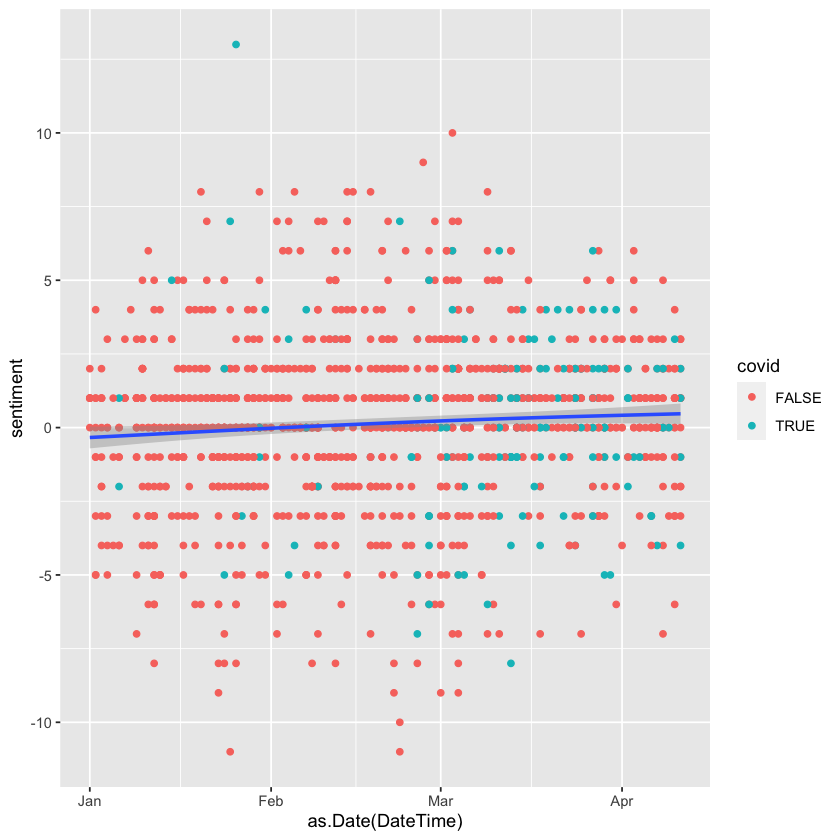

In [39]:
# A little basic visualization
ggplot(sentiments,aes(x=as.Date(DateTime),y=sentiment)) +
  geom_point(aes(color=covid)) +
  geom_smooth(method='auto')

In [41]:
covidTweets <- sentiments[sentiments$covid==TRUE,]
nonCovidTweets <- sentiments[sentiments$covid==FALSE,]

In [42]:
covidTweets

idx,positive,negative,sentiment,covid,DateTime,Text
<int>,<int>,<int>,<int>,<lgl>,<fct>,<chr>
2,2,6,-4,TRUE,2020-04-11 23:34:58+00:00,"So now the Fake News @nytimes is tracing the CoronaVirus origins back to Europe, NOT China. This is a first! I wonder what the Failing New York Times got for this one? Are there any NAMED sources? They were recently thrown out of China like dogs, and obviously want back in. Sad!"
7,4,5,-1,TRUE,2020-04-11 21:48:58+00:00,"“The President and the Federal Government are doing an excellent job. When they say the death toll isn’t going to be as high as reported, they (the opposition) act like they’re sad because it’s lower. I think they are (Press Conferences) wonderful.” West Virginia Resident, C Span"
9,1,0,1,TRUE,2020-04-11 21:08:43+00:00,"Wishing all a safe and blessed Easter Sunday. I will be tuning into Pastor @robertjeffress at http://firstdallas.org/liveworship Church in Dallas, Texas tomorrow morning at 10:20 AM Eastern."
14,2,0,2,TRUE,2020-04-11 18:33:03+00:00,"“I think the situation is unprecedented, and there is no question about that. It’s whiplash! The economy was moving forward at a rapid pace in terms of growth, jobs and even wage increases, and all of a sudden the pandemic hit and the...."
31,4,1,3,TRUE,2020-04-10 00:42:28+00:00,"I have directed @SecretarySonny to expedite help to our farmers, especially to the smaller farmers who are hurting right now. I expect Secretary Purdue to use all of the funds and authorities at his disposal to make sure that our food supply is stable, strong, and safe...."
35,1,1,0,TRUE,2020-04-09 15:08:05+00:00,.@OANN A key CoronaVirus Model is now predicting far fewer deaths than the number shown in earlier models. That’s because the American people are doing a great job. Social Distancing etc. Keep going!
45,0,0,0,TRUE,2020-04-08 15:26:20+00:00,FLATTENING OF THE CURVE!
49,0,0,0,TRUE,2020-04-08 12:46:01+00:00,Will be immediately sending 100 Ventilators to Colorado at the request of Senator Gardner!
51,2,0,2,TRUE,2020-04-08 12:07:27+00:00,“The number of New Yorkers admitted to hospitals has dropped.” @ainsleyearhardt @foxandfriends Good news!


In [59]:
# Linear regression of sentiment as a function of DateTime

lmFitCovid1 <- lm(sentiment~as.Date(DateTime), data=covidTweets)
lmFitCovid2 <- lm(sentiment~poly(as.Date(DateTime),degree=2),data=covidTweets)
lmFitCovid3 <- lm(sentiment~poly(as.Date(DateTime),degree=3),data=covidTweets)

In [57]:
lmFitCovid1


Call:
lm(formula = sentiment ~ as.Date(DateTime), data = covidTweets)

Coefficients:
      (Intercept)  as.Date(DateTime)  
       121.878247          -0.006638  


In [61]:
summary(lmFitCovid1)


Call:
lm(formula = sentiment ~ as.Date(DateTime), data = covidTweets)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1858 -1.2372 -0.1294  1.8109 12.5022 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)       121.878247 201.864816   0.604    0.547
as.Date(DateTime)  -0.006638   0.011011  -0.603    0.547

Residual standard error: 2.88 on 170 degrees of freedom
Multiple R-squared:  0.002133,	Adjusted R-squared:  -0.003737 
F-statistic: 0.3633 on 1 and 170 DF,  p-value: 0.5475


In [56]:
lmFitCovid2


Call:
lm(formula = sentiment ~ poly(as.Date(DateTime), degree = 2), 
    data = covidTweets)

Coefficients:
                         (Intercept)  poly(as.Date(DateTime), degree = 2)1  
                              0.1977                               -1.7361  
poly(as.Date(DateTime), degree = 2)2  
                              2.2254  


In [62]:
summary(lmFitCovid2)


Call:
lm(formula = sentiment ~ poly(as.Date(DateTime), degree = 2), 
    data = covidTweets)

Residuals:
   Min     1Q Median     3Q    Max 
-8.075 -1.197 -0.090  1.870 12.283 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)
(Intercept)                            0.1977     0.2199   0.899    0.370
poly(as.Date(DateTime), degree = 2)1  -1.7361     2.8837  -0.602    0.548
poly(as.Date(DateTime), degree = 2)2   2.2254     2.8837   0.772    0.441

Residual standard error: 2.884 on 169 degrees of freedom
Multiple R-squared:  0.005637,	Adjusted R-squared:  -0.00613 
F-statistic: 0.479 on 2 and 169 DF,  p-value: 0.6202


In [60]:
lmFitCovid3


Call:
lm(formula = sentiment ~ poly(as.Date(DateTime), degree = 3), 
    data = covidTweets)

Coefficients:
                         (Intercept)  poly(as.Date(DateTime), degree = 3)1  
                              0.1977                               -1.7361  
poly(as.Date(DateTime), degree = 3)2  poly(as.Date(DateTime), degree = 3)3  
                              2.2254                               -1.4213  


In [63]:
summary(lmFitCovid3)


Call:
lm(formula = sentiment ~ poly(as.Date(DateTime), degree = 3), 
    data = covidTweets)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1337 -1.1847 -0.1212  1.8134 12.3845 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)
(Intercept)                            0.1977     0.2204   0.897    0.371
poly(as.Date(DateTime), degree = 3)1  -1.7361     2.8901  -0.601    0.549
poly(as.Date(DateTime), degree = 3)2   2.2254     2.8901   0.770    0.442
poly(as.Date(DateTime), degree = 3)3  -1.4213     2.8901  -0.492    0.624

Residual standard error: 2.89 on 168 degrees of freedom
Multiple R-squared:  0.007067,	Adjusted R-squared:  -0.01066 
F-statistic: 0.3985 on 3 and 168 DF,  p-value: 0.7542


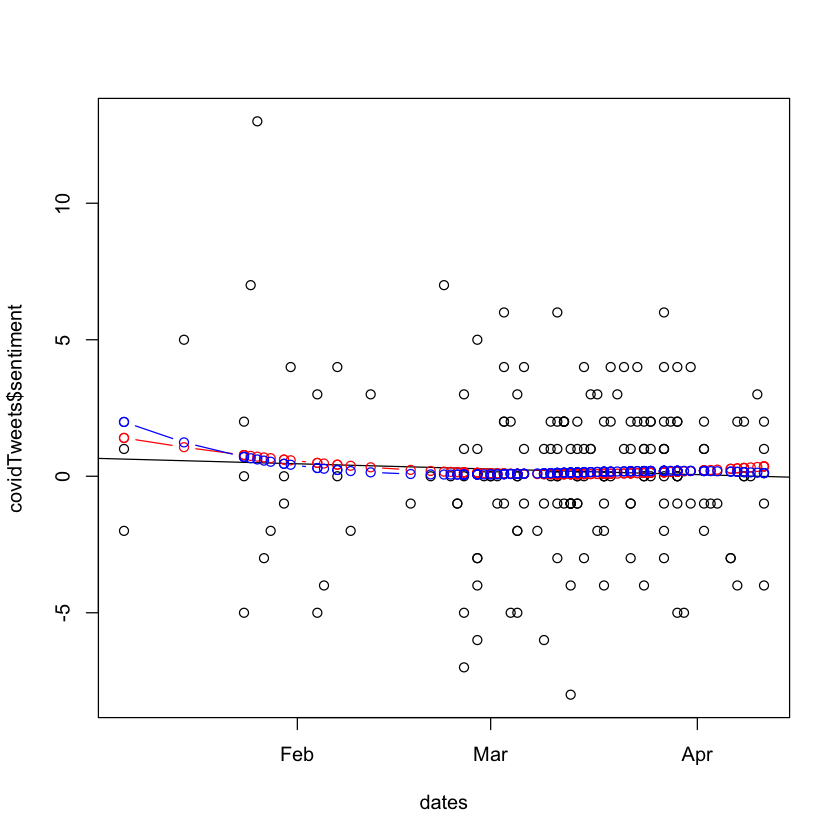

In [65]:
dates <- as.Date(covidTweets$DateTime)
plot(dates,covidTweets$sentiment)
abline(lmFitCovid1)
lines(sort(dates), fitted(lmFitCovid2)[order(dates)], col='red', type='b') 
lines(sort(dates), fitted(lmFitCovid3)[order(dates)], col='blue', type='b')

In [43]:
nonCovidTweets

idx,positive,negative,sentiment,covid,DateTime,Text
<int>,<int>,<int>,<int>,<lgl>,<fct>,<chr>
1,1,0,1,FALSE,2020-04-11 23:51:58+00:00,Will be interviewed by @JudgeJeanine tonight at 9:00 P.M. Eastern on @FoxNews!
3,5,6,-1,FALSE,2020-04-11 23:28:18+00:00,"Governor @GavinNewsom of California has been very nice & highly supportive about the great job we have done, working together, for California. That is the good news, but this is the bad. He is unfairly under attack by the Radical Left Dems, MSDNC etc. He is strong! Will he fold?"
4,1,0,1,FALSE,2020-04-11 22:38:29+00:00,I will be watching. HAVE A GREAT EASTER!
5,4,6,-2,FALSE,2020-04-11 22:35:35+00:00,"The Wall Street Journal Editorial Board doesn’t have a clue on how to fight and win. Their views on Tariffs & Trade are losers for the U.S., but winners for other countries, including China. If we followed their standards, we’d have no Country left. They should love Sleepy Joe!"
6,3,1,2,FALSE,2020-04-11 21:53:36+00:00,"Watching @FoxNews on weekend afternoons is a total waste of time. We now have some great alternatives, like @OANN."
8,1,0,1,FALSE,2020-04-11 21:36:48+00:00,Great editorial by @SenRonJohnson!
10,0,0,0,FALSE,2020-04-11 18:53:59+00:00,WE WILL BUILD IT AGAIN!
11,0,2,-2,FALSE,2020-04-11 18:47:39+00:00,....Does anyone ever notice how few quotes from an actual person are given nowadays by the Lamestream Media. Very seldom. The unnamed or anonymous sources are almost always FAKE NEWS.
12,0,3,-3,FALSE,2020-04-11 18:43:03+00:00,"When the Failing @nytimes or Amazon @washingtonpost writes a story saying “unnamed sources said”, or any such phrase where a person’s name is not used, don’t believe them. Most of these unnamed sources don’t exist. They are made up to defame & disparage. They have no “source”..."


It's possible it'd be good to use a trimmed mean sentiment value for each week, because some tweets are super super negative or super super positive. Perhaps 10% trimmed mean?

We want to add week labels to the dataframe. Or I suppose we could just filter by dates.

Something like:

```
weekn <- sentiments[DateTime>=startdate&DateTime<enddate]
```

or

```
weekn <- filter(sentiments,DateTime<=startdate&DateTime<enddate)
```

Or do by hand via idx.

## Future Work

* Encoding issue in tweet text
* Customized lexicon

Trump uses positive language in a counterintuitive way. By using a standard sentiment lexicon, we may have introduced unintended bias.